# Loan Application Case Study 

## Importing Libraries

In [1]:
#Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

In [2]:
%matplotlib inline

In [3]:
#Igoring Warning if there is any
import warnings
warnings.filterwarnings("ignore")

## Importing Dataframes

In [4]:
# Importing dataset application_data.csv into app_data dataframe.
app_data=pd.read_csv("application_data.csv")

In [5]:
# Importing dataset previous_application.csv into prev_app dataframe.
prev_app=pd.read_csv("previous_application.csv")

In [6]:
#Column description of both the datasets.
column_detail=pd.read_csv("columns_description.csv", encoding='ISO-8859-1',usecols=["Table","Row","Description","Special"])

## Dataframe Inspection

In [7]:
pd.set_option("display.max_columns",1000)

In [8]:
pd.set_option("display.max_rows",1000)

In [9]:
pd.set_option('display.max_colwidth', 1000)

In [10]:
column_detail

,Table,Row,Description,Special
0,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,application_data,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_data,CODE_GENDER,Gender of the client,NaN
4,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,application_data,AMT_ANNUITY,Loan annuity,NaN


### application_data

In [11]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
print("Number of Rows are : ",app_data.shape[0])
print("Number of Columns are: ",app_data.shape[1])

Number of Rows are :  307511
Number of Columns are:  122


In [13]:
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [14]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## Handling Missing Values

In [15]:
#Calculating percentage of missing value in each column

(app_data.isnull().sum()/app_data.shape[0])*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0


***It can be seen that there are various columns in which the percentage of missing values is very high. So, the columns with missing values higher than 45% can be dropped.***  

In [16]:
#Dropping the columns having more than 45% Missing values.
app_data.drop(columns=app_data.columns[app_data.isnull().sum()/app_data.shape[0]*100>45],inplace=True)

In [17]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

***Data provided in some of the columns is not relevant for this analysis.  So, those columns will be removed.***  

In [18]:
#Dropping all the flag Columns as it is not of any use in our analysis
app_data.drop(columns=[i for i in app_data.columns if "FLAG_DOCUMENT" in i],inplace=True)

In [19]:
#Irrelevant columns for our analysis.
unwanted=["EXT_SOURCE_2","EXT_SOURCE_3","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL",
          "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE",
         "REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION",
          "REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]

In [20]:
#Dropping unwanted columns
app_data.drop(columns=unwanted,inplace=True)

In [21]:
unwanted_1=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
           "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
app_data.drop(columns=unwanted_1,inplace=True)

In [22]:
app_data.drop(columns="DAYS_LAST_PHONE_CHANGE",inplace=True)

***Let us handle the remaining missing values***

In [23]:
#Checking Missing values in remaining columns
(app_data.isnull().sum()/app_data.shape[0])*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000


**"AMT_ANNUITY" column has .004% missing values.**

***Ways to Impute Missing values in this column*** 
1. We can replace the missing value with mean/mode/median. Since this column contain numerical values so we can choose to replace the missing values with the meadian value.
2. Since only 0.004% values are missing which is very small we can also choose to drop the rows which are have missing values for the column AMT_ANNUITY. But replacing with the median value is a better way to impute the missing values in this case so we will move ahead with this.

In [24]:
#Imputing Missing values for the column AMT_ANNUITY
app_data["AMT_ANNUITY"].fillna(app_data["AMT_ANNUITY"].median(),inplace=True)

In [25]:

app_data["AMT_ANNUITY"].isnull().sum()

0

***"AMT_GOODS_PRICE" column has .09% missing values.*** 

* We can replace the missing value with mean/mode/median. Since this column contain numerical values so we can choose to replace the missing values with the meadian value. 

In [26]:
#Imputing the missing values in the column "AMT_GOODS_PRICE"
app_data["AMT_GOODS_PRICE"].fillna(app_data["AMT_GOODS_PRICE"].median(),inplace=True)
app_data["AMT_ANNUITY"].isnull().sum()

0

***"NAME_TYPE_SUITE" column has 0.42% missing values. So it will be replaced with the mode.***

* We can replace the missing value with mean/mode/median. Since this column contain categorical value, so we can choose to replace the missing values with the Mode value as mode will give the value which is occured most of the time.

In [27]:
#finding mode
app_data["NAME_TYPE_SUITE"].mode()

0    Unaccompanied
dtype: object

In [28]:
#Imputing the missing values in column "NAME_TYPE_SUITE" with mode.
app_data["NAME_TYPE_SUITE"].fillna(value="Unaccompanied",inplace=True)

In [29]:
app_data["NAME_TYPE_SUITE"].isnull().sum()

0

**"CNT_FAM_MEMBERS" column has 0.000650% missing values.**  

1. We can replace the missing value with mean/mode/median. Since this column contain numerical values so we can choose to replace the missing values with the meadian value.
2. Since only 0.00065% values are missing which is very small we can also choose to drop the rows which are have missing values for the column AMT_ANNUITY. But replacing with the median value is a better way to impute the missing values in this case so we will move ahead with this.

In [30]:
#Imputing missing value in column CNT_FAM_MEMBERS

app_data["CNT_FAM_MEMBERS"].fillna(app_data["CNT_FAM_MEMBERS"].median(),inplace=True)
app_data["CNT_FAM_MEMBERS"].isnull().sum()

0

In [31]:
#Inspecting column OCCUPATION_TYPE
app_data["OCCUPATION_TYPE"].isnull().sum()

96391

In [32]:
#Since it's a categorical column we shouls find the mode to impute the Missing value
app_data["OCCUPATION_TYPE"].mode()

0    Laborers
dtype: object

In [33]:
#Replacing the missing values with mode 
app_data["OCCUPATION_TYPE"].fillna("Laborers",inplace=True)
app_data["OCCUPATION_TYPE"].isnull().sum()

0

In [34]:
# Checking Misisng value in app_data
app_data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OCCUPATION_TYPE               0
CNT_FAM_MEMBERS               0
WEEKDAY_APPR_PROCESS_START    0
HOUR_APPR_PROCESS_START       0
ORGANIZATION_TYPE             0
dtype: int64

### Univariate Analysis

In [35]:
#Checking Unique value in the column SK_ID_CURR
app_data["SK_ID_CURR"].nunique()

307511

* All the values in Column SK_ID_CURR are Unique

In [36]:
#Checking the values in the column TARGET
app_data["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [37]:
#Checking the values in the column NAME_CONTRACT_TYPE.
app_data["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [38]:
#Checking the values in the column CODE_GENDER.
app_data["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

**We can see there are three types of values in the column F,M and XNA.**

***Since XNA is not  the correct value so we need to impute this value.***
1. One way of imputing this value is to replace the XNA with value "Not Available".
2. Since there are only 4 rows which are having "XNA" we can also choose to drop these rows as there are more than 30,000 rows in total.

In [39]:
app_data[app_data["CODE_GENDER"]=="XNA"].index

Int64Index([35657, 38566, 83382, 189640], dtype='int64')

***In the CODE_GENDER column, 4 rows have gender value equal to "XNA". As the number of rows with XNA values are very less as compared to total number of rows in app_data dataframe. So, the rows with XNA can be dropped.***    

In [40]:
#Dropping the rows which are having Code_Gender as XNA
app_data.drop(labels=[35657, 38566, 83382, 189640],inplace=True)

In [41]:
#Checking the values ater dropping Missing values.
app_data["CODE_GENDER"].value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [42]:
#Checking values in the column FLAG_OWN_CAR
app_data["FLAG_OWN_CAR"].value_counts()

N    202922
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [43]:
#Checking values in the column FLAG_OWN_CAR
app_data['FLAG_OWN_REALTY'].value_counts()

Y    213308
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [44]:
#Checking values in the column CNT_CHILDREN
app_data["CNT_CHILDREN"].describe()

count    307507.000000
mean          0.417047
std           0.722119
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

***In CNT_CHILDREN column, maximum value for number of children is 19 which is suspicious. So box-plot will be used to view the outliers in the data.*** 

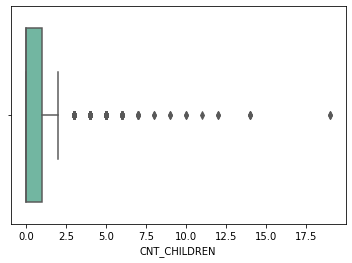

In [45]:
#Plotting box Plot for column CNT_CHILDREN to check out outliers
sns.boxplot(app_data["CNT_CHILDREN"],palette="Set2")
plt.show()

***It can be seen from the boxplot that there are outliers in the "CNT_CHILDREN" column. But many outliers are those values which are possible.***

In [157]:
#Calculating how many rows are there for which value is greater than the 99.9 percentile  of the column app_data["CNT_CHILDREN"]
app_data[app_data["CNT_CHILDREN"]>app_data["CNT_CHILDREN"].quantile(.999)].shape[0]

126

In [158]:
#percentage of rows having value greater than 99.9 percentile.
app_data[app_data["CNT_CHILDREN"]>app_data["CNT_CHILDREN"].quantile(.999)].shape[0]/len(app_data)*100

0.04097467699922278

***There are 126 data points which are above 99.9 percentile.***

* We can either cap the values to 99.9percentile, which is 4 in this case  or we can choose to remove the rows having outliers

In [159]:
#Dropping the rows having outliers for column CNT_CHILDREN
app_data.drop(labels=app_data[app_data["CNT_CHILDREN"]>app_data["CNT_CHILDREN"].quantile(.999)].index,inplace=True)

In [160]:
app_data["CNT_CHILDREN"].describe()

count    307381.000000
mean          0.414733
std           0.711387
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           4.000000
Name: CNT_CHILDREN, dtype: float64

In [161]:
#Checking column "AMT_INCOME_TOTAL"

app_data["AMT_INCOME_TOTAL"].describe()

count    3.073810e+05
mean     1.687981e+05
std      2.371644e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

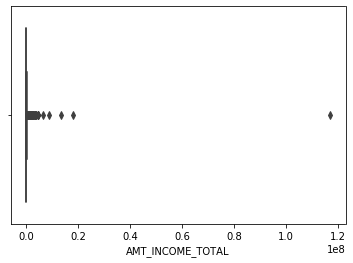

In [162]:
#Box plot for the column AMT_INCOME_TOTAL so that we can check outliers
sns.boxplot(app_data["AMT_INCOME_TOTAL"])
plt.show()

***In AMT_INCOME_TOTAL column, there are outliers. But there is a posibility that some people have high income. ***

In [163]:
#Inspecting column AMT_CREDIT
app_data["AMT_CREDIT"].describe()

count    3.073810e+05
mean     5.990482e+05
std      4.025059e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

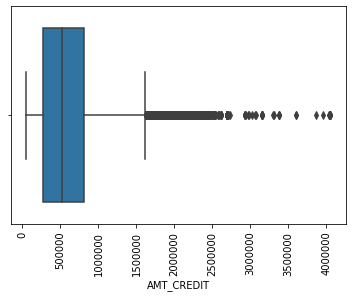

In [164]:
#Box plot for column AMT_CREDIT
sns.boxplot(app_data["AMT_CREDIT"])
plt.xticks(rotation=90)
plt.show()

* We can see many outliers in the AMT_CREDIT column, it is possible that some people have taken loan for huge sum so we will leave as it is.

In [165]:
#Inspecting AMT_ANNUITY column
app_data["AMT_ANNUITY"].describe()

count    307381.000000
mean      27108.735314
std       14493.870394
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

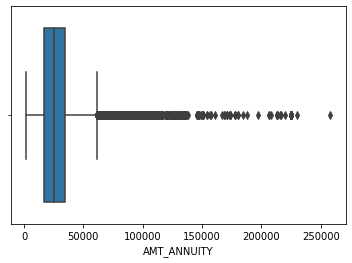

In [166]:
sns.boxplot(app_data["AMT_ANNUITY"])
plt.show()

In [167]:
app_data[app_data["AMT_ANNUITY"]>=250000.000000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,-15176,-201,-1529.0,-4722,Managers,4.0,THURSDAY,14,Industry: type 4


In [168]:
#Inspecting AMT_GOODS_PRICE column
app_data["AMT_GOODS_PRICE"].describe()

count    3.073810e+05
mean     5.383413e+05
std      3.693060e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

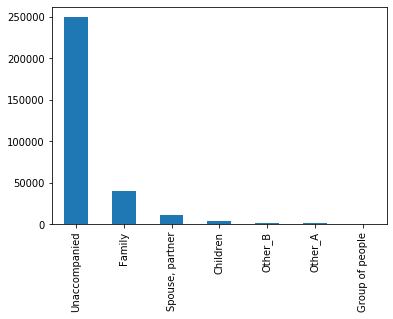

In [169]:
#Inspecting NAME_TYPE_SUITE
app_data["NAME_TYPE_SUITE"].value_counts().plot.bar();

* From the above plot we can see the most of the people came alone for the loan process.

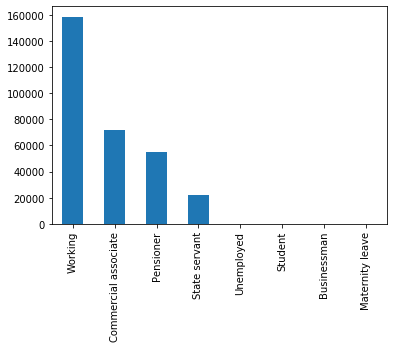

In [170]:
app_data["NAME_INCOME_TYPE"].value_counts().plot.bar()
plt.show()

* Most of the people who applied for the loan are from Working group

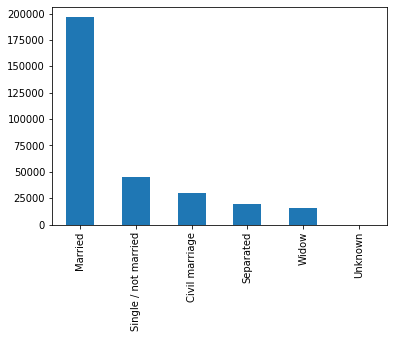

In [171]:
#Inspecting column NAME_FAMILY_STATUS
app_data["NAME_FAMILY_STATUS"].value_counts().plot.bar()
plt.show()

* Most of the people are married who applied of loan.
* Also we observe that there are some rows for which family status is UNKNOWN.

In [172]:
#Finding out the data for which  NAME_FAMILY_STATUS is in Unknown.
app_data[app_data["NAME_FAMILY_STATUS"]=="Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,450000.0,Unaccompanied,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,Managers,2.0,THURSDAY,15,Insurance
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,450000.0,Unaccompanied,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,Accountants,2.0,FRIDAY,14,Business Entity Type 2


***We can see there are two rows for which family status is unknown.***  
**These people do not have any children so it might be possible that these people are single**

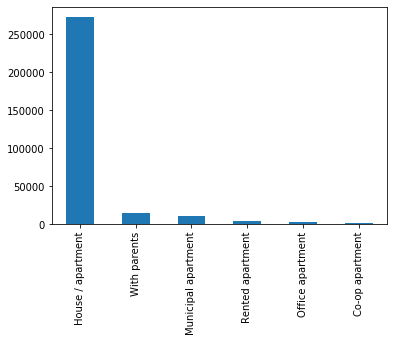

In [173]:
#Inspecting NAME_HOUSING_TYPE column
app_data["NAME_HOUSING_TYPE"].value_counts().plot.bar()
plt.show()

* Most of the people live in House/Apartment who applied for the loan

In [174]:
#Inspecting REGION_POPULATION_RELATIVE column
app_data["REGION_POPULATION_RELATIVE"].describe()

count    307381.000000
mean          0.020869
std           0.013832
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [175]:
#checking data type of the column DAYS_BIRTH
app_data["DAYS_BIRTH"].dtype

dtype('int64')

***"Days_birth" column represents the number of days from date of birth. So for better understanding of data, it is converted to age of the customer at the time of application.***

In [176]:
#Deriving a new column Age from the column DAYS_BIRTH.
app_data["Age"]=np.abs(app_data["DAYS_BIRTH"]/365).round(0)

In [177]:
#Inspecting the column Age
app_data["Age"].describe()

count    307381.000000
mean         43.940188
std          11.965360
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: Age, dtype: float64

In [178]:
#Inspecting Column DAYS_EMPLOYED
app_data["DAYS_EMPLOYED"].describe()

count    307381.000000
mean      63835.917903
std      141293.074840
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

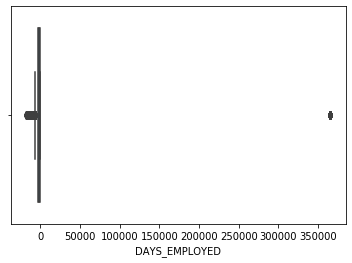

In [179]:
sns.boxplot(app_data["DAYS_EMPLOYED"])
plt.show()

In [180]:
app_data[app_data["DAYS_EMPLOYED"]>0]["NAME_INCOME_TYPE"].value_counts()

Pensioner     55346
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

***In "DAYS_EMPLOYED" column, outliers can be observed. After thorough investigation, it can observed that this outlier value is entered to represent those applicants who are not working anyhere at the time of application. So, these values can be either kept as it is or can be replaced with 0 days because they are not working.***

In [181]:
#Investing column DAYS_REGISTRATION
app_data["DAYS_REGISTRATION"].describe()

count    307381.000000
mean      -4986.620562
std        3523.020680
min      -24672.000000
25%       -7480.000000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64

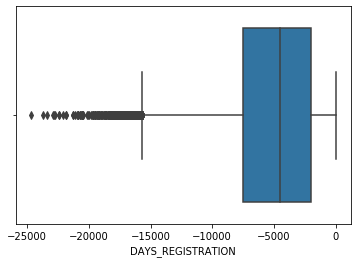

In [182]:
sns.boxplot(app_data["DAYS_REGISTRATION"])
plt.show()

In [183]:
app_data["DAYS_REGISTRATION"].quantile(0.95)

-330.0

***"DAYS_REGISTRATION" column represents How many days before the application did client change his registration. So for better understanding of data, it is converted to years.*** 

In [184]:
#Converting Days_Registration to year and assingng it to new column YEAR_REGISTRATION
app_data["YEARS_REGISTRATION"]=np.abs(app_data["DAYS_REGISTRATION"]/365).round(0)

In [185]:
app_data["DAYS_ID_PUBLISH"].describe()

count    307381.000000
mean      -2994.123606
std        1509.435164
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64

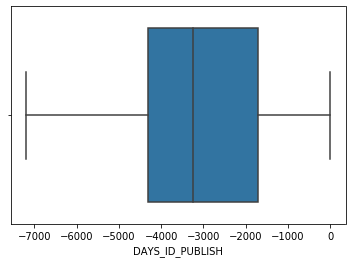

In [186]:
sns.boxplot(app_data["DAYS_ID_PUBLISH"])
plt.show()

In [187]:
app_data["DAYS_ID_PUBLISH"].quantile(0.95)

-375.0

***"DAYS_ID_PUBLISH" column represents How many days before the application did client change his registration. So for better understanding of data, it is converted to years.*** 

In [188]:
app_data["YEARS_ID_PUBLISH"]=np.abs(app_data["DAYS_ID_PUBLISH"]/365).round(0)

In [189]:
#Inspecting the column CNT_FAM_MEMBERS
app_data["CNT_FAM_MEMBERS"].describe()

count    307381.000000
mean          2.150273
std           0.901917
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max           6.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [190]:
#Inspecting ORGANIZATION_TYPE column
app_data["ORGANIZATION_TYPE"].value_counts()

Business Entity Type 3    67968
XNA                       55368
Self-employed             38395
Other                     16670
Medicine                  11189
Business Entity Type 2    10551
Government                10399
School                     8884
Trade: type 7              7830
Kindergarten               6871
Construction               6719
Business Entity Type 1     5981
Transport: type 4          5397
Trade: type 3              3492
Industry: type 9           3365
Industry: type 3           3275
Security                   3245
Housing                    2954
Industry: type 11          2703
Military                   2633
Bank                       2507
Agriculture                2447
Police                     2341
Transport: type 2          2203
Postal                     2156
Security Ministries        1972
Trade: type 2              1900
Restaurant                 1809
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

***In ORGANIZATION_TYPE column, there is one category "XNA" which is unknown. So, let us try to explore dataset to identify the reson behind this unknown entries.***

In [191]:
#Checking for what type of income oragnization type is XNA.

In [192]:
app_data[app_data["ORGANIZATION_TYPE"]=="XNA"]["NAME_INCOME_TYPE"].value_counts()

Pensioner     55346
Unemployed       22
Name: NAME_INCOME_TYPE, dtype: int64

***From the above code, it is clear that "XNA" represents the applicants who are either pensioner or unemployed. As they are not currently working anywhere, so this special category (XNA) is introduced to represent non working applicants.*** 

### Duplicate Values Check

In [193]:
app_data[app_data.duplicated()==True]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,Age,YEARS_REGISTRATION,YEARS_ID_PUBLISH




***No duplicate entry is there in the given data set.***

### Bining data: Creating groups for columns having continuous data

In [194]:
#Binning for AMT_ANNUITY_GROUP
app_data["AMT_ANNUITY_GROUP"]=pd.cut(app_data["AMT_ANNUITY"],bins=[0,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,3000000],labels=["Less than 5000","5000-10000","10000-15000","15000-20000","20000-25000","25000-30000","30000-35000","35000-40000","40000-45000","45000-50000","More than 50000"],right=False)

In [195]:
#Binning for AMT_CREDIT_GROUP
app_data["AMT_CREDIT_GROUP"]=pd.cut(app_data["AMT_CREDIT"],bins=[0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,756000,806000,850000,900000,950000,1000000,1500000,2000000,2500000,3000000,3500000,4000000,10000000],
                                    labels=["Less than 50000","50000-100000","100000-150000","150000-200000","200000-250000","250000-300000","300000-350000","350000-400000","400000-450000","450000-500000","500000-550000","550000-600000","600000-650000","650000-700000","700000-750000","750000-800000","800000-850000","850000-900000","900000-950000","950000-1000000","1000000-1500000","1500000-2000000","2000000-2500000","2500000-3000000","3000000-3500000","3500000-4000000","More than 4000000"],right=False)

In [196]:
#Binning for AMT_INCOME_GROUP into low, avg, high amd very high income group
app_data["AMT_INCOME_GROUP"]=pd.cut(app_data["AMT_INCOME_TOTAL"],bins=[0,125000,250000,375000,500000000],labels=["Low-Income","Avg-Income","High-Income","V-High-Income"],right=False)

In [197]:
#Binning Age into age groups starting from 20-30 up to 60+
app_data["Age_GROUP"]=pd.cut(app_data["Age"],bins=[20,30,40,50,60,70],labels=["20-30","30-40","40-50","50-60","60+"],right=False)

### Segmented Dataframes

In [198]:
#Creating app_data_1 for Traget variable 1, which which means the applicant is defaulter app_data _0 for Target variable 0.
app_data_1=app_data[app_data["TARGET"]==1]
app_data_0=app_data[app_data["TARGET"]==0]

### Data Imbalance Ratio

In [199]:
ratio=len(app_data_0)/len(app_data_1)
print("Data imbalance ratio is :", ratio)

Data imbalance ratio is : 11.389898827038575


### Univariate analysis on segmented dataframes

In [200]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'Age',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'AMT_ANNUITY_GROUP',
       'AMT_CREDIT_GROUP', 'AMT_INCOME_GROUP', 'Age_GROUP'],
      dtype='object')

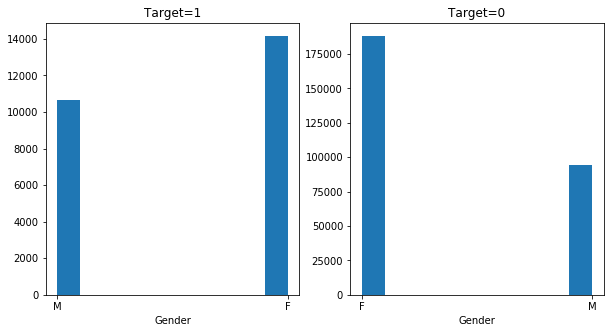

In [201]:
#CODE_GENDER Column

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(app_data_1["CODE_GENDER"])
plt.title("Target=1")
plt.xlabel("Gender")
plt.subplot(1,2,2)
plt.hist(app_data_0["CODE_GENDER"])
plt.title("Target=0")
plt.xlabel("Gender")
plt.show()

1. From both charts it is clear that no. of defaulter applicants is less.
2. No. of Female is more than the no. of men who applied for loan.

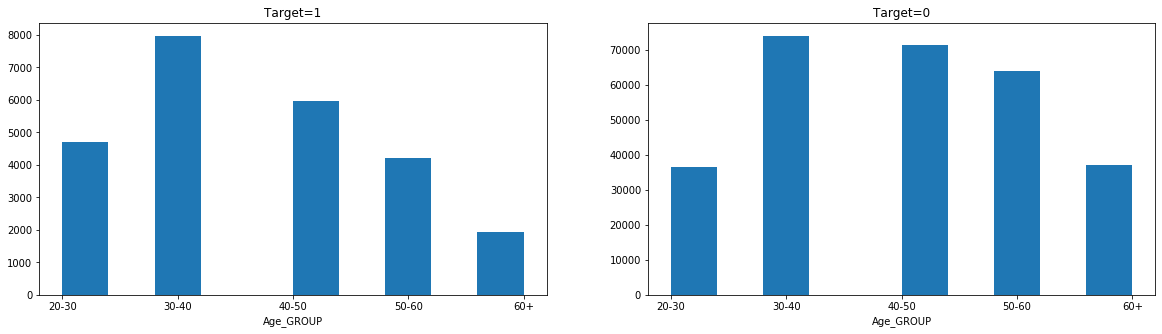

In [202]:
#Age- Group Column
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(app_data_1["Age_GROUP"].sort_values())
plt.title("Target=1")
plt.xlabel("Age_GROUP")
plt.subplot(1,2,2)
plt.hist(app_data_0["Age_GROUP"].sort_values())
plt.title("Target=0")
plt.xlabel("Age_GROUP")
plt.show()

1. The most of the loan applicant belongs to age group 30-40.
2. Age group 60+ are less likely to be defaulter.

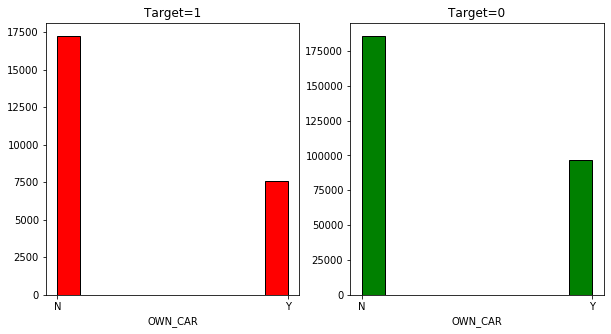

In [203]:
#Flag_OWN_CAR

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(app_data_1["FLAG_OWN_CAR"].sort_values(),edgecolor="black",color="red")
plt.title("Target=1")
plt.xlabel("OWN_CAR")
plt.xticks(rotation=0)
plt.subplot(1,2,2)
plt.hist(app_data_0["FLAG_OWN_CAR"].sort_values(),edgecolor="black",color="green")
plt.title("Target=0")
plt.xlabel("OWN_CAR")
plt.xticks(rotation=0)
plt.show()

* Most of the people does not own a car who applied for the loan.

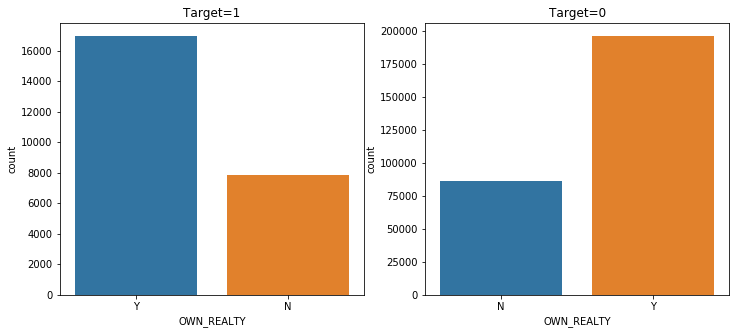

In [204]:
#FLAG_OWN_RELATY

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(app_data_1["FLAG_OWN_REALTY"])
plt.title("Target=1")
plt.xlabel("OWN_REALTY")
plt.xticks(rotation=0)
plt.subplot(1,2,2)
sns.countplot(app_data_0["FLAG_OWN_REALTY"])
plt.title("Target=0")
plt.xlabel("OWN_REALTY")
plt.xticks(rotation=0)
plt.show()

*  Most of the people own a house or a flat who applied for loan.

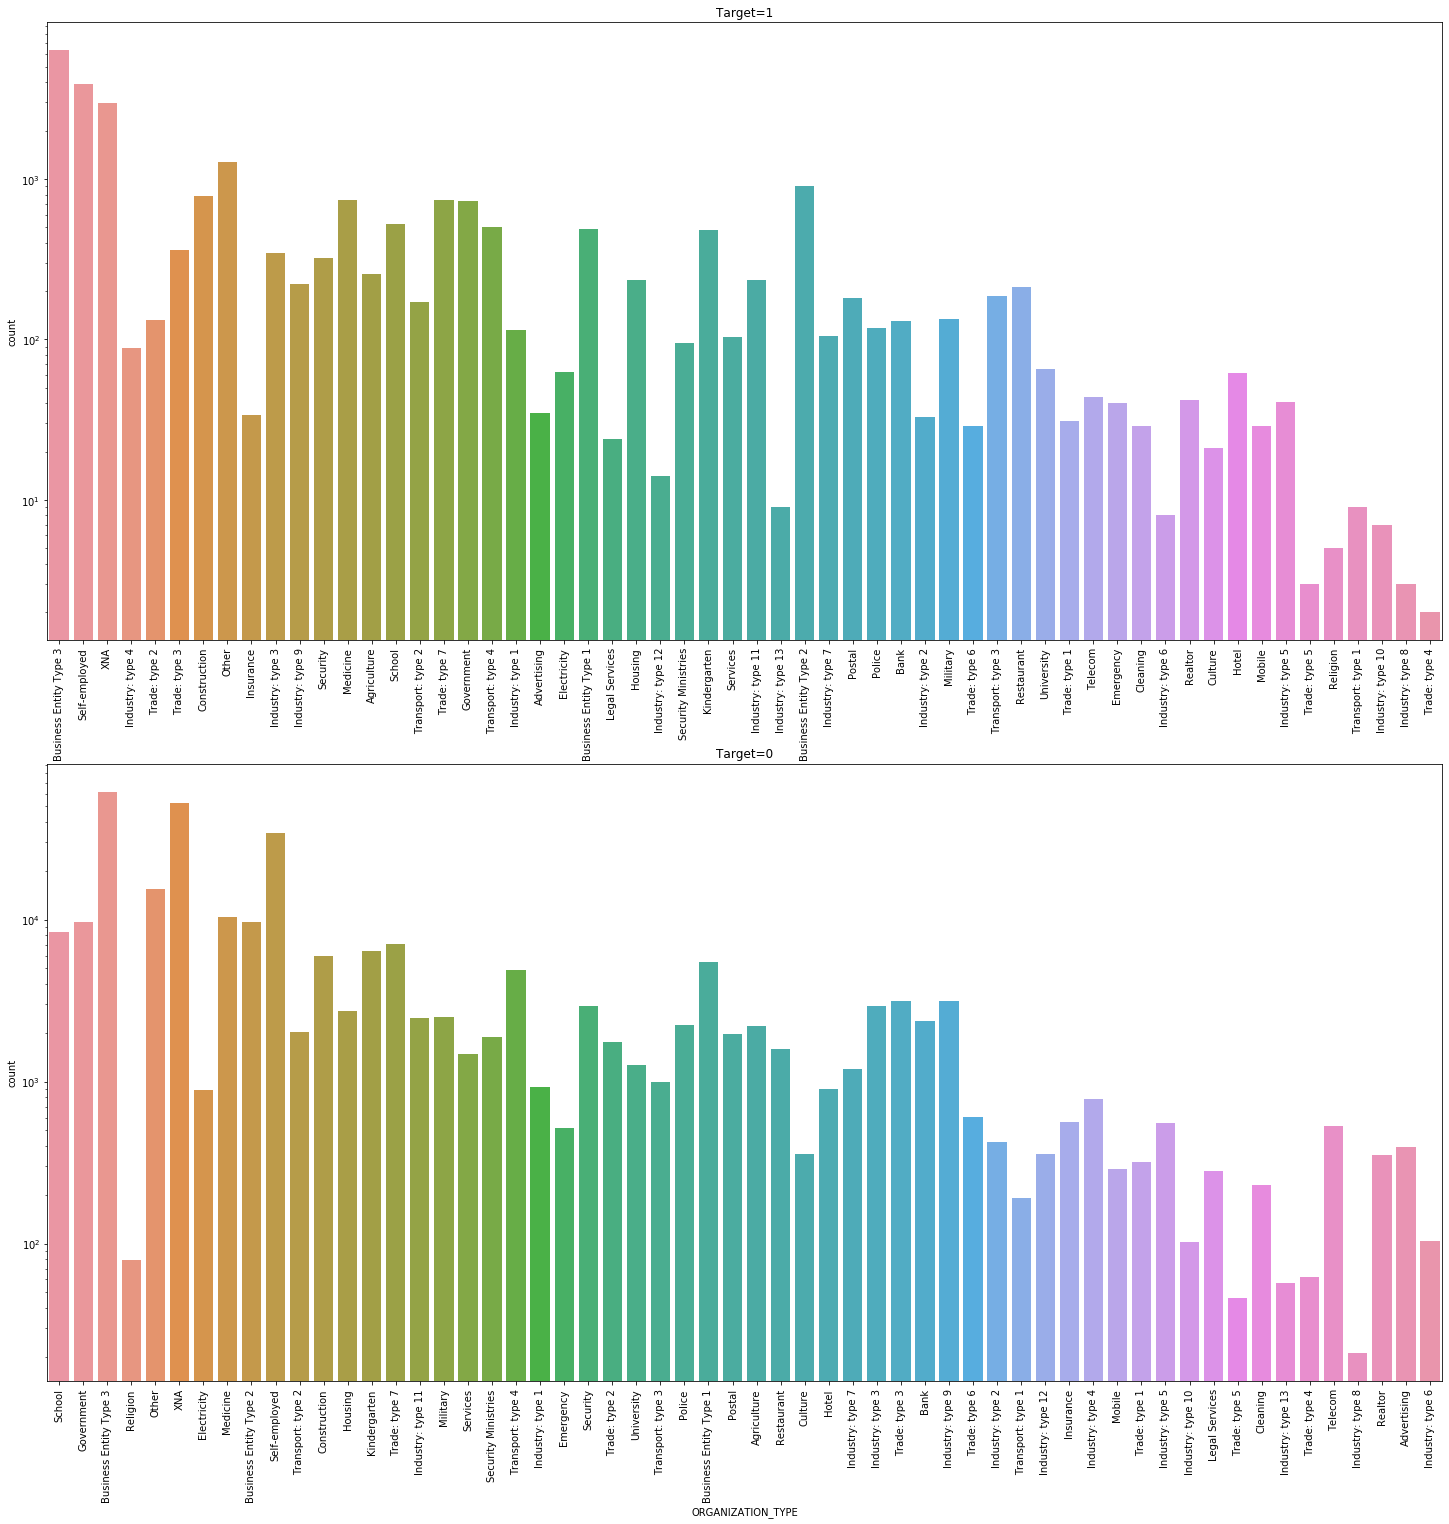

In [205]:
#ORAGNIZATION TYPE

plt.figure(figsize=(25,25))
plt.subplot(2,1,1)
sns.countplot(app_data_1["ORGANIZATION_TYPE"])
plt.title("Target=1")
plt.xlabel("ORGANIZATION_TYPE")
plt.xticks(rotation=90)
plt.yscale("log")
plt.subplot(2,1,2)
sns.countplot(app_data_0["ORGANIZATION_TYPE"])
plt.title("Target=0")
plt.xlabel("ORGANIZATION_TYPE")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

1. From the above graph it is clear that Most of people who applied to loan are from Business Entity type-3.
2. People who are less likely to be defaulter belongs to Trade type-4.



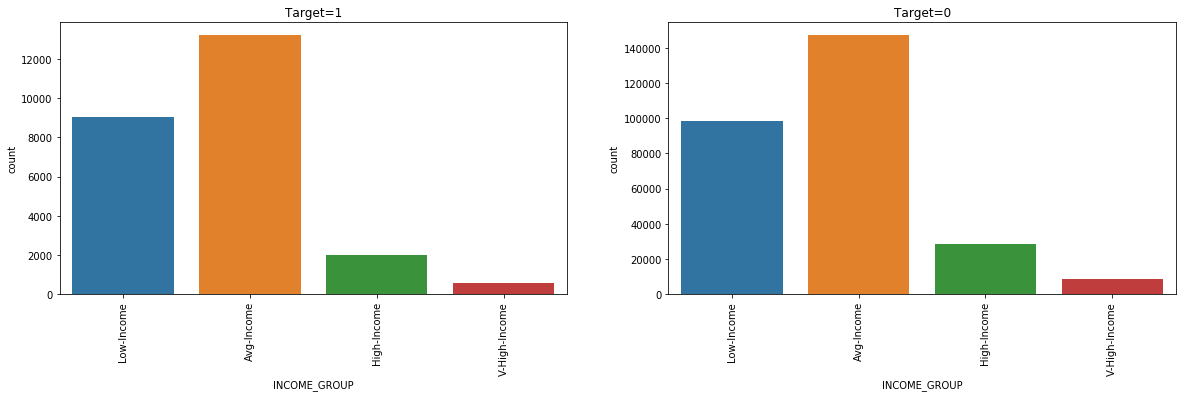

In [209]:
#INCOME_GROUP 

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(app_data_1["AMT_INCOME_GROUP"])
plt.title("Target=1")
plt.xlabel("INCOME_GROUP")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_0["AMT_INCOME_GROUP"])
plt.title("Target=0")
plt.xlabel("INCOME_GROUP")
plt.xticks(rotation=90)
plt.show()

1. People with Avergae income apply most for the loan.
2. People from income group  very High Income group apply least.

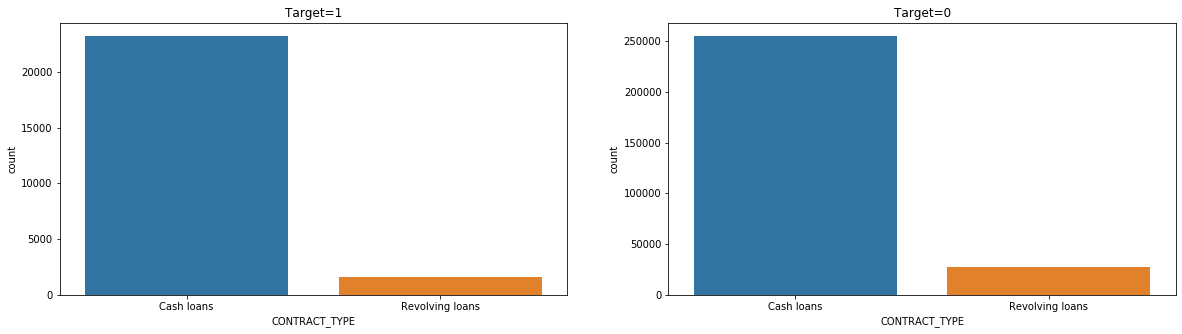

In [210]:
#CONTRACT TYPE

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(app_data_1["NAME_CONTRACT_TYPE"])
plt.title("Target=1")
plt.xlabel("CONTRACT_TYPE")
plt.xticks(rotation=0)
plt.subplot(1,2,2)
sns.countplot(app_data_0["NAME_CONTRACT_TYPE"])
plt.title("Target=0")
plt.xlabel("CONTRACT_TYPE")
plt.xticks(rotation=0)
plt.show()

***Most of the people apply for Cash Loans.***

In [211]:
#INCOME TYPE

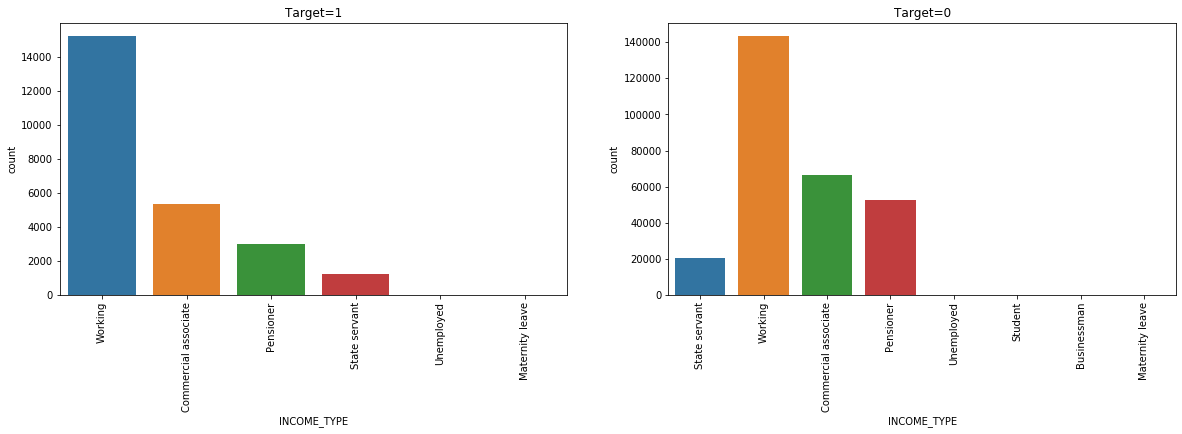

In [212]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(app_data_1["NAME_INCOME_TYPE"])
plt.title("Target=1")
plt.xlabel("INCOME_TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_0["NAME_INCOME_TYPE"])
plt.title("Target=0")
plt.xlabel("INCOME_TYPE")
plt.xticks(rotation=90)
plt.show()

***Most of the people belongs to "WORKING" class who applied for loan.***

***ALso we can see students and business man are not in defaulters they pay their loan on time.***

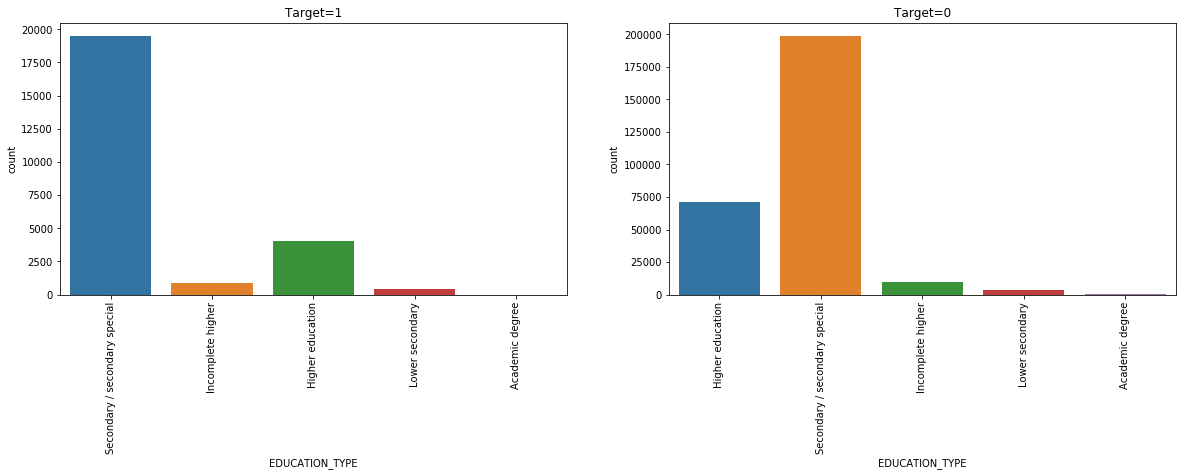

In [213]:
#EDUCATION TYPE

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(app_data_1["NAME_EDUCATION_TYPE"])
plt.title("Target=1")
plt.xlabel("EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.countplot(app_data_0["NAME_EDUCATION_TYPE"])
plt.title("Target=0")
plt.xlabel("EDUCATION_TYPE")
plt.xticks(rotation=90)
plt.show()

***People whose education type is secondary/secondary special apply most for the loans.***

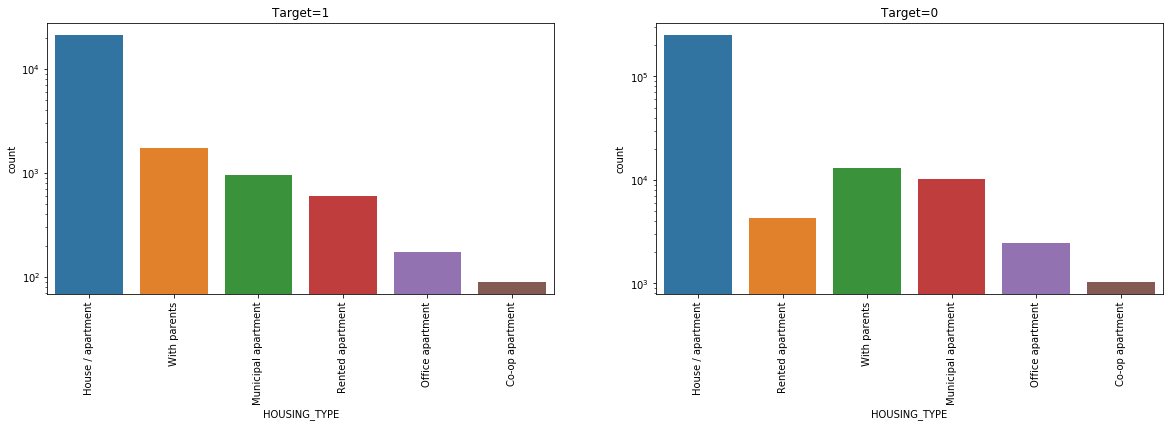

In [214]:
#HOUSING TYPE

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot(app_data_1["NAME_HOUSING_TYPE"])
plt.title("Target=1")
plt.xlabel("HOUSING_TYPE")
plt.xticks(rotation=90)
plt.yscale("log")
plt.subplot(1,2,2)
sns.countplot(app_data_0["NAME_HOUSING_TYPE"])
plt.title("Target=0")
plt.xlabel("HOUSING_TYPE")
plt.xticks(rotation=90)
plt.yscale("log")
plt.show()

***People who own aprtment/house are more likely to apply for loans.***

***People living in Co-op appartment are less likely to apply for loans.***

### Bivariate Analysis

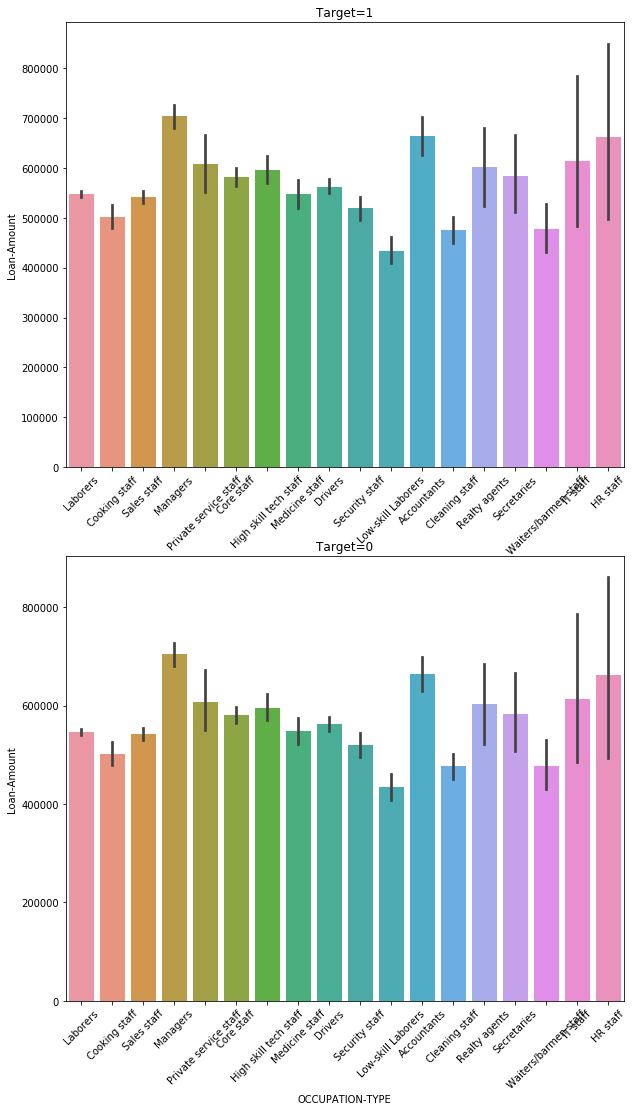

In [219]:
#OCCUPATION_TYPE vs AMT_CREDITED
plt.figure(figsize=(10,18))
plt.subplot(2,1,1)
sns.barplot(x=app_data_1["OCCUPATION_TYPE"],y=app_data_1["AMT_CREDIT"])
plt.title("Target=1")
plt.xlabel("OCCUPATION-TYPE")
plt.xticks(rotation=45)
plt.ylabel("Loan-Amount")


plt.subplot(2,1,2)
sns.barplot(x=app_data_1["OCCUPATION_TYPE"],y=app_data_1["AMT_CREDIT"])
plt.title("Target=0")
plt.xlabel("OCCUPATION-TYPE")
plt.ylabel("Loan-Amount")
plt.xticks(rotation=45)

plt.show()

### Inferences:
1. We can see that Managers and HR Staff opt for high amount of loan.
2. Low Skill laborers opt for less amount of loan.
3. Managers tends not to pay their installments on time.

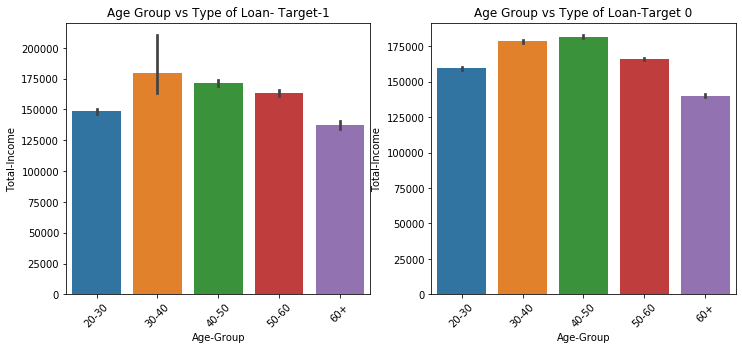

In [220]:
#Age Group  vs AMT_INCOME_TOTAL

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["Age_GROUP"],y=app_data_1["AMT_INCOME_TOTAL"])
plt.title("Age Group vs Type of Loan- Target-1")
plt.xlabel("Age-Group")
plt.xticks(rotation=45)
plt.ylabel("Total-Income")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["Age_GROUP"],y=app_data_0["AMT_INCOME_TOTAL"])
plt.title("Age Group vs Type of Loan-Target 0")
plt.xlabel("Age-Group")
plt.xticks(rotation=45)
plt.ylabel("Total-Income")
plt.show()

## Inferences

1. Target -1 , In defaulter group age group 30-40 have more income than others.
2. Target - 0, Age group 40-50 has the most income.
3. In both the segmented dataframe age group 60+ has the least income, which is obvious as the afe group 60+ is the retired population.

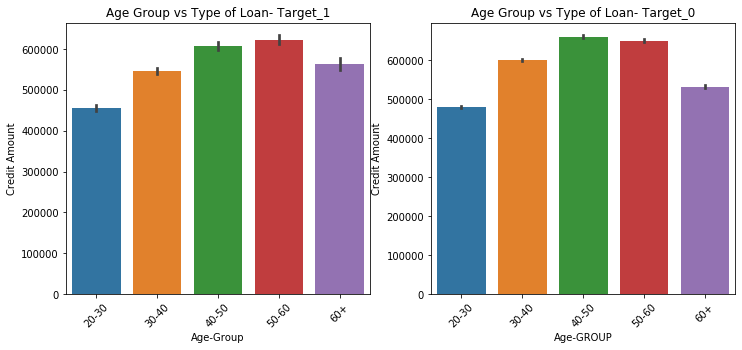

In [222]:
#Age Group  vs AMT_CREDIT

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["Age_GROUP"],y=app_data_1["AMT_CREDIT"])
plt.title("Age Group vs Type of Loan- Target_1")
plt.xlabel("Age-Group")
plt.xticks(rotation=45)
plt.ylabel("Credit Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["Age_GROUP"],y=app_data_0["AMT_CREDIT"])
plt.title("Age Group vs Type of Loan- Target_0")
plt.xlabel("Age-GROUP")
plt.xticks(rotation=45)
plt.ylabel("Credit Amount")

plt.show()

### Inferences
1. Age group 50-60 tends to have highest amount of lean in defaulter group where as age - group 40-50 have the highest amount of loan and tends to pay it on time.
2. Age group 60+ has higher no of people who does not pay the loan on time than the people in same age group who pays their loan on time

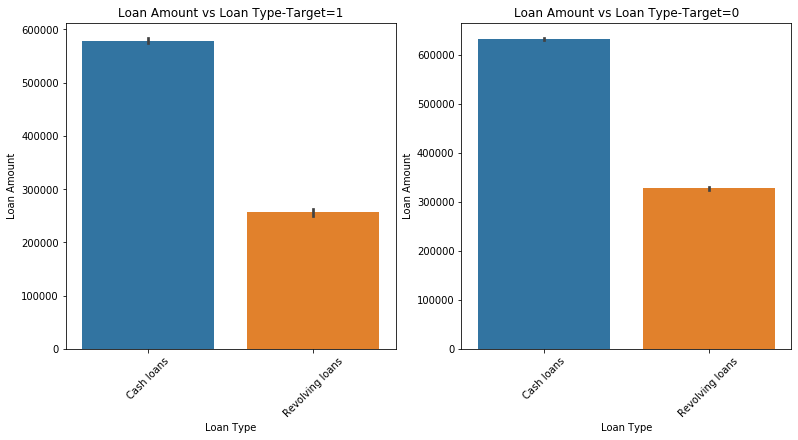

In [223]:
#NAME_CONTRACT_TYPE vs AMT_CREDIT
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["NAME_CONTRACT_TYPE"],y=app_data_1["AMT_CREDIT"])
plt.title("Loan Amount vs Loan Type-Target=1")
plt.xlabel("Loan Type")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["NAME_CONTRACT_TYPE"],y=app_data_0["AMT_CREDIT"])
plt.title("Loan Amount vs Loan Type-Target=0")
plt.xlabel("Loan Type")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.show()

### Inferences
1. More loan were given as Cash than the revolving loan for both the categories traget 1 and target 0.

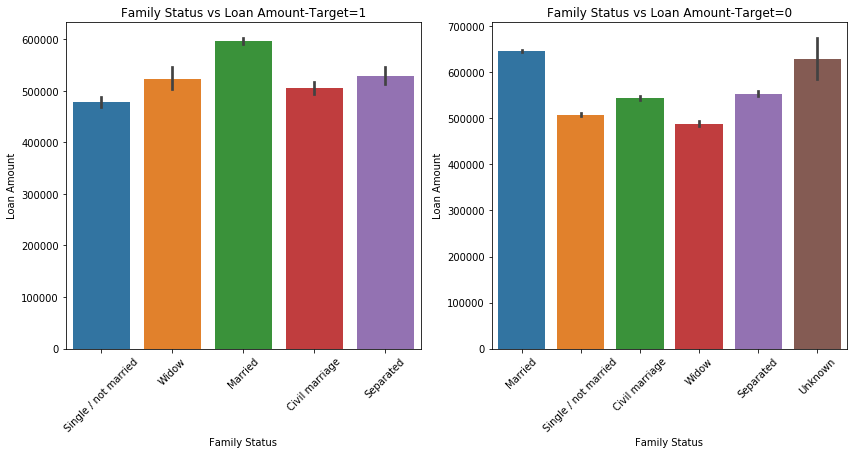

In [224]:
#Family Status vs Loan Amount
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["NAME_FAMILY_STATUS"],y=app_data_1["AMT_CREDIT"])
plt.title("Family Status vs Loan Amount-Target=1")
plt.xlabel("Family Status")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["NAME_FAMILY_STATUS"],y=app_data_0["AMT_CREDIT"])
plt.title("Family Status vs Loan Amount-Target=0")
plt.xlabel("Family Status")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.show()

### Inferences:
1. Married people have highest loan amount in both Defaulter(Target 1) and non-defaulter (Target-0) groups.
2. Single people have lowest loan amount in Defaulters Group whereas Widowed have lowest loan amount in Non-defaulter group.


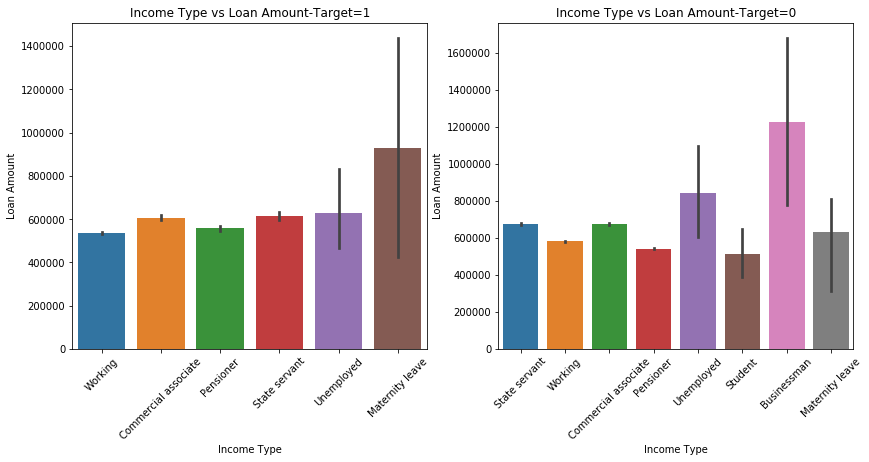

In [226]:
#Income Type vs Loan Amount
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["NAME_INCOME_TYPE"],y=app_data_1["AMT_CREDIT"])
plt.title("Income Type vs Loan Amount-Target=1")
plt.xlabel("Income Type")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["NAME_INCOME_TYPE"],y=app_data_0["AMT_CREDIT"])
plt.title("Income Type vs Loan Amount-Target=0")
plt.xlabel("Income Type")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.show()

### Inferences:
1. From the above graph we can see Students and Businessman never fails to pay their loan.
2. Businessmen have the highest amount of loan in non- defaulter group(Target-1)
3. Working People have lowest amount of loan in the defaulter(Target-1) group whereas Pensioner have the lowest loan in Non-Defaulter group.

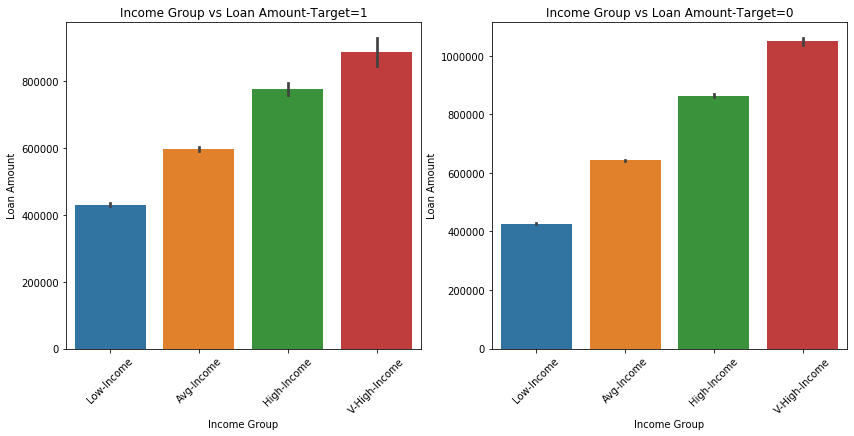

In [227]:
#Income Group vs Loan Amount.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["AMT_INCOME_GROUP"],y=app_data_1["AMT_CREDIT"])
plt.title("Income Group vs Loan Amount-Target=1")
plt.xlabel("Income Group")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["AMT_INCOME_GROUP"],y=app_data_0["AMT_CREDIT"])
plt.title("Income Group vs Loan Amount-Target=0")
plt.xlabel("Income Group")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.show()


### Inferences:
1. Plots for both the group is almost same for both the group, the People who belongs to Very High Income group have highest amount of Loan and people who belongs to low income group has lowest amount of loan.

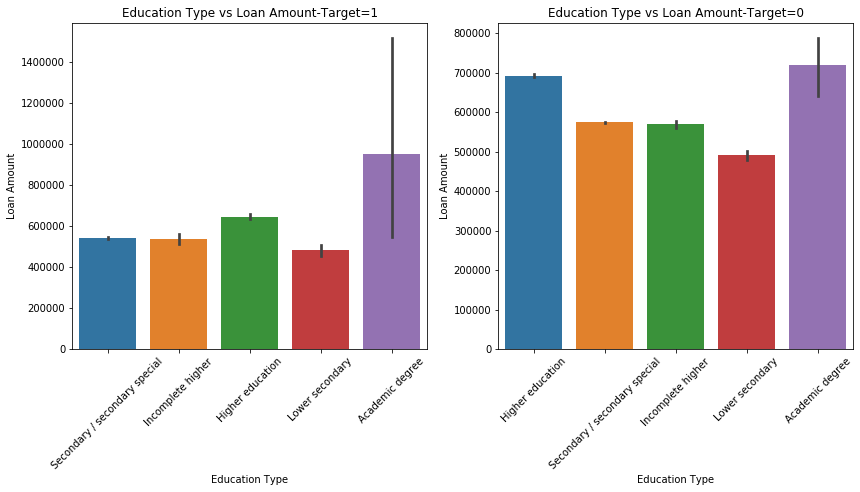

In [229]:
#NAME_EDUCATION_TYPE VS AMT_CREDIT
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x=app_data_1["NAME_EDUCATION_TYPE"],y=app_data_1["AMT_CREDIT"])
plt.title("Education Type vs Loan Amount-Target=1")
plt.xlabel("Education Type")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.subplot(1,2,2)
sns.barplot(x=app_data_0["NAME_EDUCATION_TYPE"],y=app_data_0["AMT_CREDIT"])
plt.title("Education Type vs Loan Amount-Target=0")
plt.xlabel("Education Type")
plt.xticks(rotation=45)
plt.ylabel("Loan Amount")
plt.show()


### Inferences:
1. People with acedemic degree opt for higher amount of loan.
2. People with Lower Secondary education opt for less amount of loan.


### Correlation between numeric columns

In [233]:
target0_corr=app_data_0.iloc[0:,2:]
target1_corr=app_data_1.iloc[0:,2:]

corr_0=target0_corr.corr(method='spearman')
corr_1=target1_corr.corr(method='spearman')

In [234]:
corr_0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,Age,YEARS_REGISTRATION,YEARS_ID_PUBLISH
CNT_CHILDREN,1.000000,0.038400,0.002423,0.024829,-0.001173,-0.025520,0.375747,-0.161142,0.180414,-0.019874,0.810226,0.001940,-0.375765,-0.180288,0.019675
AMT_INCOME_TOTAL,0.038400,1.000000,0.416027,0.485694,0.419728,0.097744,0.093617,-0.174553,0.076435,0.035927,0.045067,0.102341,-0.093632,-0.076409,-0.036171
AMT_CREDIT,0.002423,0.416027,1.000000,0.831876,0.984998,0.053623,-0.057054,-0.120427,0.009458,-0.001994,0.079661,0.051326,0.057097,-0.009294,0.001860
AMT_ANNUITY,0.024829,0.485694,0.831876,1.000000,0.829798,0.058591,0.011821,-0.129774,0.037734,0.016543,0.096540,0.054178,-0.011796,-0.037636,-0.016990
AMT_GOODS_PRICE,-0.001173,0.419728,0.984998,0.829798,1.000000,0.062672,-0.058248,-0.122189,0.009551,-0.004043,0.079528,0.058799,0.058278,-0.009402,0.003872
REGION_POPULATION_RELATIVE,-0.025520,0.097744,0.053623,0.058591,0.062672,1.000000,-0.030767,-0.002537,-0.036656,-0.010454,-0.017679,0.128227,0.030698,0.036681,0.010744
DAYS_BIRTH,0.375747,0.093617,-0.057054,0.011821,-0.058248,-0.030767,1.000000,-0.234254,0.298103,0.262125,0.282396,0.098501,-0.999725,-0.298199,-0.262665
DAYS_EMPLOYED,-0.161142,-0.174553,-0.120427,-0.129774,-0.122189,-0.002537,-0.234254,1.000000,-0.037324,-0.117732,-0.177210,-0.049144,0.234135,0.037191,0.117614
DAYS_REGISTRATION,0.180414,0.076435,0.009458,0.037734,0.009551,-0.036656,0.298103,-0.037324,1.000000,0.094203,0.158919,-0.008409,-0.298123,-0.999427,-0.094877
DAYS_ID_PUBLISH,-0.019874,0.035927,-0.001994,0.016543,-0.004043,-0.010454,0.262125,-0.117732,0.094203,1.000000,-0.013930,0.039801,-0.262143,-0.094240,-0.996320


In [235]:
corr_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,Age,YEARS_REGISTRATION,YEARS_ID_PUBLISH
CNT_CHILDREN,1.000000,-0.004809,0.000357,0.033598,-0.007457,-0.031129,0.268411,-0.115939,0.133653,-0.027224,0.822878,-0.022861,-0.268531,-0.134100,0.027734
AMT_INCOME_TOTAL,-0.004809,1.000000,0.359449,0.431725,0.362665,0.051396,-0.007215,-0.117798,0.036431,-0.005788,0.003827,0.088272,0.007100,-0.036395,0.005931
AMT_CREDIT,0.000357,0.359449,1.000000,0.811490,0.976434,0.039950,-0.155288,-0.083849,-0.016997,-0.054056,0.067677,0.028425,0.155280,0.017602,0.054475
AMT_ANNUITY,0.033598,0.431725,0.811490,1.000000,0.804139,0.023436,-0.030530,-0.096773,0.035951,-0.014647,0.088603,0.032055,0.030426,-0.035590,0.014257
AMT_GOODS_PRICE,-0.007457,0.362665,0.976434,0.804139,1.000000,0.054144,-0.157770,-0.086395,-0.019077,-0.059965,0.064800,0.039925,0.157668,0.019631,0.060161
REGION_POPULATION_RELATIVE,-0.031129,0.051396,0.039950,0.023436,0.054144,1.000000,-0.046327,-0.003744,-0.034399,-0.023546,-0.022260,0.106240,0.046452,0.034451,0.023987
DAYS_BIRTH,0.268411,-0.007215,-0.155288,-0.030530,-0.157770,-0.046327,1.000000,-0.107276,0.232811,0.251805,0.172541,0.066000,-0.999653,-0.233442,-0.252077
DAYS_EMPLOYED,-0.115939,-0.117798,-0.083849,-0.096773,-0.086395,-0.003744,-0.107276,1.000000,-0.017695,-0.049966,-0.144392,-0.027305,0.107264,0.017665,0.049594
DAYS_REGISTRATION,0.133653,0.036431,-0.016997,0.035951,-0.019077,-0.034399,0.232811,-0.017695,1.000000,0.096003,0.126706,-0.031756,-0.232591,-0.999255,-0.097032
DAYS_ID_PUBLISH,-0.027224,-0.005788,-0.054056,-0.014647,-0.059965,-0.023546,0.251805,-0.049966,0.096003,1.000000,-0.029047,0.026413,-0.251646,-0.095737,-0.997143


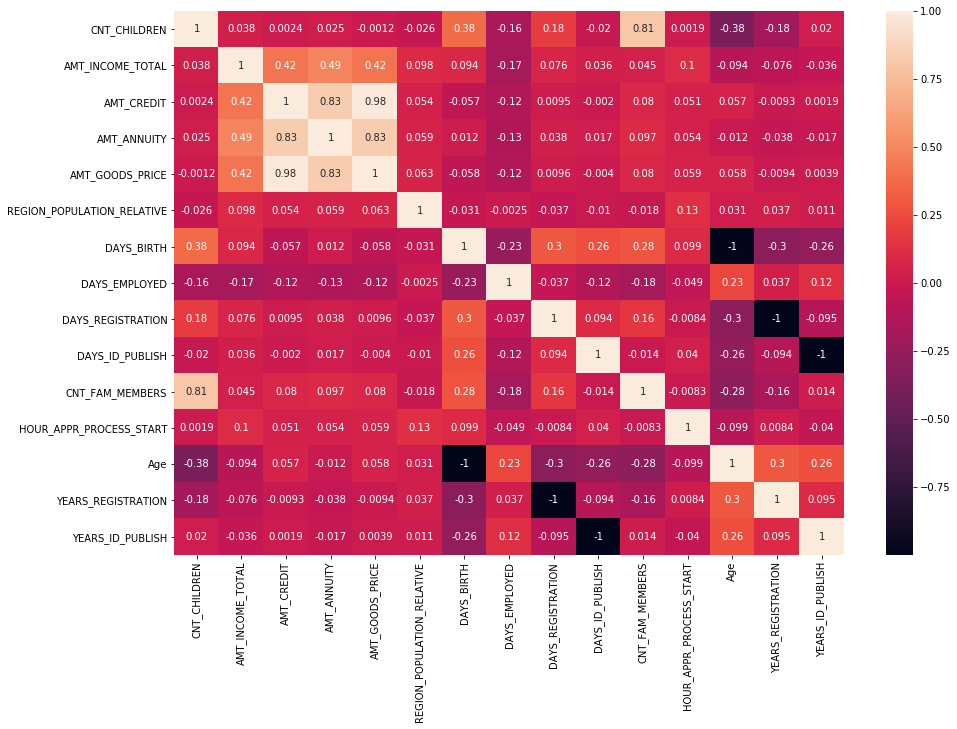

In [369]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_0,annot=True)
plt.show()

#### Inferences
1. Credit_amount is inversely propotional to days_birth.
2. Credit_amount is iversly proptional to days_employed.
3. Densly populated areas have more number of childrens.

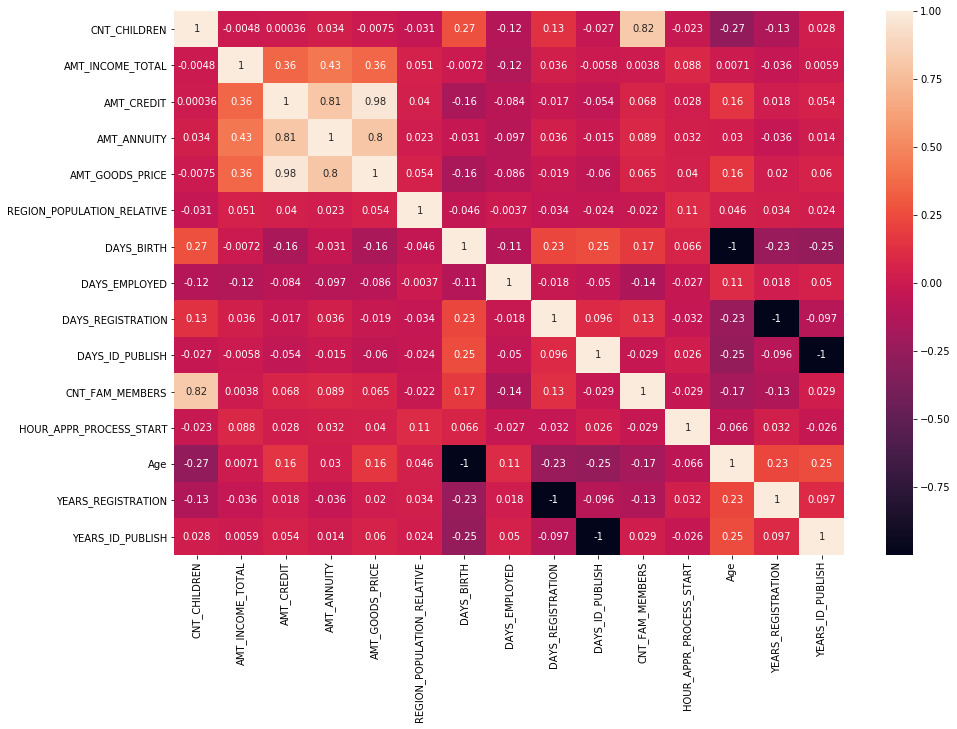

In [370]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_1,annot=True)
plt.show()

#### Inferences
1. Person with higher income has higher credit amount.
2. 


### previous_application

In [423]:
#Checking values in prev_app 
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [424]:
#Checking for duplicate value in previous application dataframe
prev_app[prev_app.duplicated()==True]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


* We can see there is no duplicate value in the prev_app dataframe

In [425]:
#Checking column data type and info
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [426]:
#Numerical Columns Description
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [427]:
#Finding out the percentage of  Missing value in each column of previous application data set.
prev_app.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [428]:
#Cleaning the missing data

# Dropping the columns with missing value percentage more than 45%

prev_app.drop(columns=prev_app.columns[prev_app.isnull().sum()/prev_app.shape[0]*100>45],inplace=True)

In [429]:
# Handling the missing values in "AMT_ANNUITY" column
prev_app[prev_app["AMT_ANNUITY"].isnull()]["NAME_CONTRACT_STATUS"].value_counts()

Canceled        305805
Refused          40898
Unused offer     25524
Approved             8
Name: NAME_CONTRACT_STATUS, dtype: int64

*** It can be seen from above code that the missing values in "AMT_ANNUITY" column are not random. Majority of missing values are for applicants whose appication were either cancled or refused. So, dropping these missing values will lead to bias in data. Hence it is better to impute them.***

In [430]:
#Replacing Mising value in AMT_ANNUITY Column wit median
prev_app["AMT_ANNUITY"].fillna(prev_app["AMT_ANNUITY"].median(),inplace=True)

In [431]:
prev_app["AMT_ANNUITY"].isnull().sum()

0

In [432]:
#Handling the missing values in "AMT_GOODS_PRICE" column
prev_app[prev_app["AMT_GOODS_PRICE"].isnull()]["NAME_CONTRACT_STATUS"].value_counts()

Canceled        305570
Approved         42835
Refused          37105
Unused offer         5
Name: NAME_CONTRACT_STATUS, dtype: int64

*** It can be seen from above code that the missing values in "AMT_GOODS_PRICE" column are not random. Majority of missing values are for applicants whose appication were cancled. So, dropping these missing values will lead to bias in data. Hence it is better to impute them.***

In [433]:
#Replacing Mising value in AMT_ANNUITY Column wit median
prev_app["AMT_GOODS_PRICE"].fillna(prev_app["AMT_GOODS_PRICE"].median(),inplace=True)

In [434]:
#Handling the missing values in "AMT_CREDIT" column
prev_app["AMT_CREDIT"].isnull().sum()

1

***There is only 1 missing value in "AMT_CREDIT" column. So, it can be dropped.*** 

In [435]:
#Dropping Missing value row in AMT_CREDIT
prev_app["AMT_CREDIT"].dropna(inplace=True)

In [436]:
prev_app["AMT_CREDIT"].isnull().sum()

0

In [437]:
#Handling the missing values in "CNT_PAYMENT" column
prev_app[prev_app["CNT_PAYMENT"].isnull()]["NAME_CONTRACT_STATUS"].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

*** It can be seen from above code that the missing values in "CNT_PAYMENT" column are not random. Majority of missing values are for applicants whose appication were either cancled or refused. So, dropping these missing values will lead to bias in data. Hence it is better to impute them.***

In [438]:
#Replacing Missing value with median
prev_app["CNT_PAYMENT"].fillna(prev_app["CNT_PAYMENT"].median(),inplace=True)

In [439]:
#Handling the missing values in "PRODUCT_COMBINATION" column
prev_app["PRODUCT_COMBINATION"].isnull().sum()

346

***The missing values in "PRODUCT_COMBINATION" column are very less. So they can be removed.***

In [440]:
prev_app["PRODUCT_COMBINATION"].dropna(inplace=True)

In [441]:
prev_app["PRODUCT_COMBINATION"].isnull().sum()

0

### Removing unwanted columns

In [442]:
prev_unwanted=["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"
              ,"DAYS_DECISION","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","SELLERPLACE_AREA","NAME_SELLER_INDUSTRY",
              "DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"]

In [443]:
prev_app.drop(columns=prev_unwanted,inplace=True)

In [444]:
 #Checking columns of prev_app
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [445]:
#Checking the shape of prev_app
prev_app.shape

(1670214, 16)

In [446]:
#Checking Unique value in column SK_ID_PREV
prev_app["SK_ID_PREV"].nunique()

1670214

In [447]:
#Checking Unique value in column SK_ID_PREV
prev_app["SK_ID_CURR"].nunique()

338857

## Univariate Analysis

In [448]:
#Investigating column NAME_CONTRACT_TYPE
prev_app["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

***In "NAME_CONTRACT_TYPE" column, 346 rows have an unknown category "XNA" and the data corresponding to these rows is either imputed with mode values or have unknown categories. So, it is better to remove these rows. Also the number of rows are very small so removing them will not cause any significany loss in data.***

In [449]:
#Dropping XNA values
prev_app.drop(prev_app[prev_app["NAME_CONTRACT_TYPE"]=="XNA"].index,inplace=True)

In [450]:
prev_app["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [451]:
#Investigating NAME_CASH_LOAN_PURPOSE
prev_app["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 922315
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

***From the above analysis it can be seen that majority of rows have values either "XAP" or "XNA" category. Let explore this further to have better understanding of data.***

In [452]:
prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XAP"]["NAME_CONTRACT_TYPE"].value_counts()

Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

***The above line of code clearly explains that the "XAP" category is used for the application for which the "NAME_CASH_LOAN_PURPOSE" column is not applicabe.  As the name of column explains that this column contains data corresponding to the purpose behind the cash loan. But for the customers who have not applied for cash loan, the categorical value used in this column is "XAP".***

In [453]:
prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XNA"]["NAME_CONTRACT_TYPE"].value_counts()

Cash loans    677918
Name: NAME_CONTRACT_TYPE, dtype: int64

In [454]:
prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XNA"]["NAME_GOODS_CATEGORY"].value_counts()

XNA    677918
Name: NAME_GOODS_CATEGORY, dtype: int64

***"XNA" category used in NAME_CASH_LOAN_PURPOSE column is representing those application where the data is missing or not known. So, for the applications with "XNA" values, neither the purpose of the loan is known nor the type of good for which the loan is applied. Hence, the rows with "XNA" values will not contribute significantly in further analysis. It is better to drop the rws with "XNA" values.*** 

In [455]:
#Dropping the columns with XNA value
prev_app.drop(prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XNA"].index,inplace=True)

In [456]:
#Dropping the columns with XAP value
prev_app.drop(prev_app[prev_app["NAME_CASH_LOAN_PURPOSE"]=="XAP"].index,inplace=True)

In [457]:
prev_app["NAME_CASH_LOAN_PURPOSE"].value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [458]:
#Investigating column NAME_CONTRACT_TYPE
prev_app["NAME_CONTRACT_STATUS"].value_counts()

Refused         40858
Approved        26933
Canceled         1639
Unused offer      205
Name: NAME_CONTRACT_STATUS, dtype: int64

In [459]:
#Investigating NAME_PAYMENT_TYPE column
prev_app["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        63835
XNA                                           5416
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

* We can see there is XNA available in NAME _PAYMENT_TYPE, it indicates these values are not avaialbele so we will drop these values,

In [460]:
#Dropping XNA values
prev_app.drop(prev_app[prev_app["NAME_PAYMENT_TYPE"]=="XNA"].index,inplace=True)

In [461]:
prev_app["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        63835
Non-cash from your account                     320
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64

In [462]:
#"NAME_GOODS_CATEGORY"
prev_app["NAME_GOODS_CATEGORY"].value_counts()

XNA    64219
Name: NAME_GOODS_CATEGORY, dtype: int64

***Since all the rows of NAME_GOODS_CATEGORY is XNA we will remove this  column.***

In [463]:
#Droping "NAME_GOODS_CATEGORY" column
prev_app.drop(["NAME_GOODS_CATEGORY"],axis=1,inplace=True)

In [466]:
prev_app["CODE_REJECT_REASON"].value_counts()

XAP       26239
HC        20831
LIMIT      8171
SCO        4752
VERIF      2207
SCOFR      1308
CLIENT      202
SYSTEM        2
Name: CODE_REJECT_REASON, dtype: int64

In [465]:
#Dropping XNA Values
prev_app.drop(prev_app[prev_app["CODE_REJECT_REASON"]=="XNA"].index,inplace=True)

In [469]:
#Dropping XAP Values
prev_app.drop(prev_app[prev_app["CODE_REJECT_REASON"]=="XAP"].index,inplace=True)

In [482]:
prev_app["CODE_REJECT_REASON"].value_counts()

HC        20831
LIMIT      8171
SCO        4752
VERIF      2207
SCOFR      1308
CLIENT      202
SYSTEM        2
Name: CODE_REJECT_REASON, dtype: int64

In [484]:
prev_app["NAME_YIELD_GROUP"].value_counts()

low_normal    12328
high          11431
middle         9697
low_action     3784
XNA             233
Name: NAME_YIELD_GROUP, dtype: int64

***we will drop the XNA value in the column NAME_YIELD_GROUP***

In [486]:
prev_app.drop(prev_app[prev_app["NAME_YIELD_GROUP"]=="XNA"].index,inplace=True)

In [487]:
prev_app["NAME_YIELD_GROUP"].value_counts()

low_normal    12328
high          11431
middle         9697
low_action     3784
Name: NAME_YIELD_GROUP, dtype: int64

### Merging two datasets

In [488]:
merge_df=pd.merge(left=app_data,right=prev_app,how='inner',on='SK_ID_CURR',suffixes='_x')

In [489]:
merge_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,Age,YEARS_REGISTRATION,YEARS_ID_PUBLISH,AMT_ANNUITY_GROUP,AMT_CREDIT_GROUP,AMT_INCOME_GROUP,Age_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,Laborers,2.0,WEDNESDAY,13,Business Entity Type 3,42.0,14.0,10.0,20000-25000,650000-700000,High-Income,40-50,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,Payments on other loans,Refused,Cash through the bank,HC,Repeater,60.0,low_action,Cash Street: low
1,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236.0,-4292,Managers,2.0,TUESDAY,8,Business Entity Type 3,44.0,23.0,12.0,25000-30000,500000-550000,Avg-Income,40-50,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,Repairs,Refused,Cash through the bank,LIMIT,Repeater,24.0,low_normal,Cash Street: low
2,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,666000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022625,-12955,-4106,-7054.0,-5164,Managers,2.0,MONDAY,15,Medicine,35.0,19.0,14.0,45000-50000,800000-850000,Avg-Income,30-40,2481012,Cash loans,29543.850,202500.0,247837.5,202500.0,Buying a used car,Refused,Cash through the bank,LIMIT,Repeater,12.0,high,Cash Street: high
3,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,666000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022625,-12955,-4106,-7054.0,-5164,Managers,2.0,MONDAY,15,Medicine,35.0,19.0,14.0,45000-50000,800000-850000,Avg-Income,30-40,1528229,Cash loans,22877.010,157500.0,192762.0,157500.0,Buying a used car,Refused,Cash through the bank,LIMIT,Repeater,12.0,high,Cash Street: high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,666000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022625,-12955,-4106,-7054.0,-5164,Managers,2.0,MONDAY,15,Medicine,35.0,19.0,14.0,45000-50000,800000-850000,Avg-Income,30-40,1068253,Cash loans,26738.775,270000.0,393322.5,270000.0,Buying a used car,Refused,Cash through the bank,LIMIT,Repeater,36.0,high,Cash Street: high


In [490]:
#Renaming columns
merge_df.rename({'NAME_CONTRACT_TYPE_':'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT', 'AMT_ANNUITY_':"AMT_ANNUITY", 
 'AMT_GOODS_PRICE_':"AMT_GOODS_PRICE", 
 'NAME_CONTRACT_TYPEx': "NAME_CONTRACT_TYPE_prev", 'AMT_ANNUITYx': "AMT_ANNUITY_prev",'AMT_CREDITx' :"AMT_CREDIT_prev",
       'AMT_GOODS_PRICEx':"AMT_GOODS_PRICE_prev"}, axis=1, inplace=True)

In [491]:
merge_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'Age',
       'YEARS_REGISTRATION', 'YEARS_ID_PUBLISH', 'AMT_ANNUITY_GROUP',
       'AMT_CREDIT_GROUP', 'AMT_INCOME_GROUP', 'Age_GROUP', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_prev', 'AMT_ANNUITY_prev', 'AMT_APPLICATION',
       'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_CLIENT_TYPE', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
      

###  Ananlysis

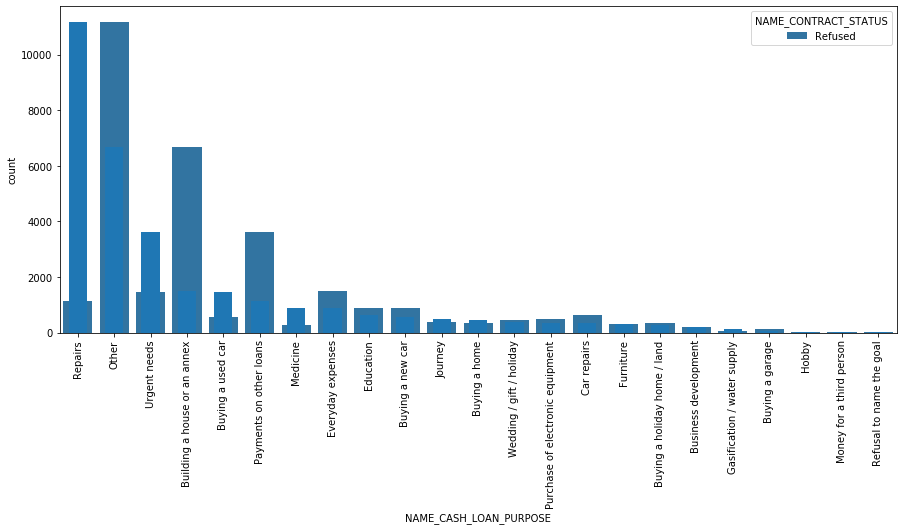

In [526]:
plt.figure(figsize=(15,6))
sns.countplot(x=merge_df["NAME_CASH_LOAN_PURPOSE"],hue=merge_df["NAME_CONTRACT_STATUS"])
merge_df["NAME_CASH_LOAN_PURPOSE"].value_counts().plot.bar()
plt.show()

### Inferences
1. Most of the loan were taken for repairs and were Approved.
2. Loan for Buying a used car has been refused most of the time.
3. In all rest cases except journey most of the loans were approved.

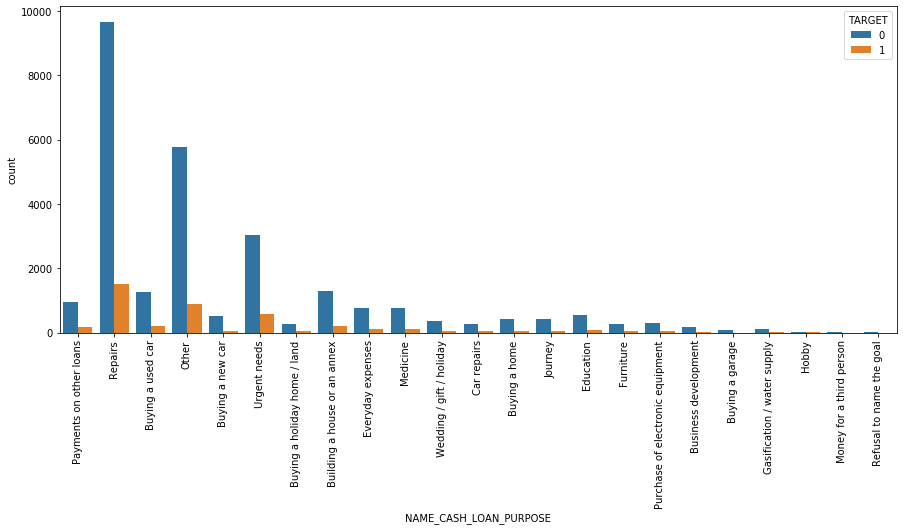

In [493]:
plt.figure(figsize=(15,6))
sns.countplot(x=merge_df["NAME_CASH_LOAN_PURPOSE"],hue=merge_df["TARGET"])
plt.xticks(rotation=90)
plt.show()

### Inferences
1. People who buy take loans for repair are the one who take are deafulters most of the time.
2. People who refuse to take the name of the goal pay their loan on time.
3. People who take education loan,Journey,Buying a house  or for Urgent Needs Mostly pay their loan on time.

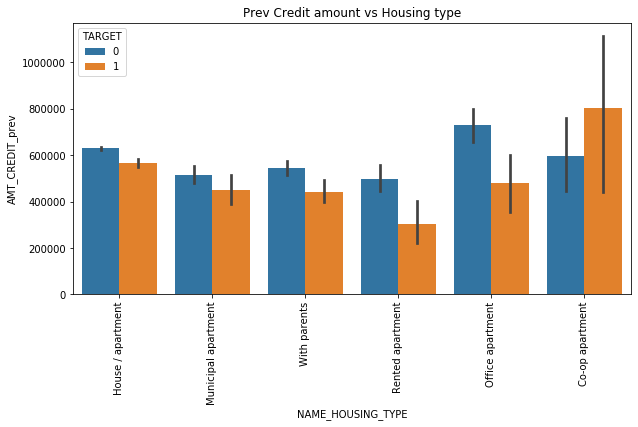

In [494]:
#AMT_CREDIT Vs NAME HOUSING TYPE.
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(data =merge_df, y='AMT_CREDIT_prev',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

### Inferences
1. From the previous data it is clear that people who are living in Co-op Apartments/ Office apartments are most likely to be defaulters

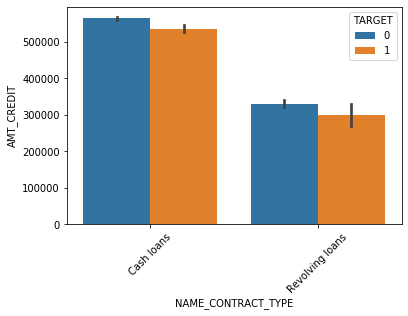

In [511]:
#Name contract type vs amt credited
sns.barplot(x=merge_df["NAME_CONTRACT_TYPE"],y=merge_df["AMT_CREDIT"],hue=merge_df["TARGET"])
plt.xticks(rotation=45)
plt.show()

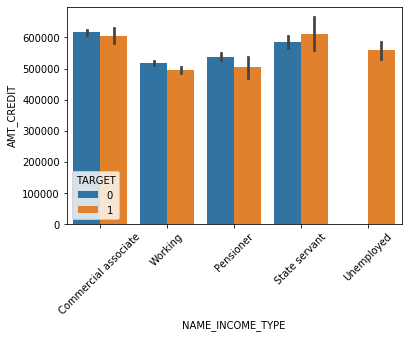

In [509]:
#Name income type vs amt credited
sns.barplot(x=merge_df["NAME_INCOME_TYPE"],y=merge_df["AMT_CREDIT"],hue=merge_df["TARGET"])
plt.xticks(rotation=45)
plt.show()

#### Inferences
1. We can see that the no of people in both defaulter and non defaulter group have alomost same amount of loan.
2. State Servents opt for highest amount of loan.
3. Unemployed people are always defaulter.


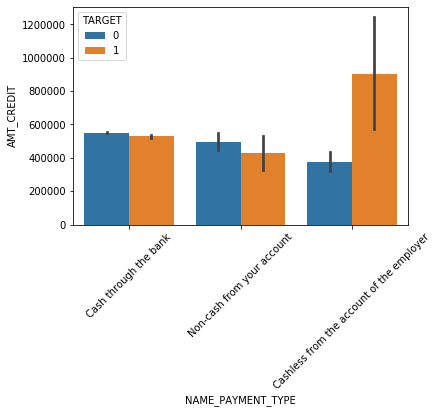

In [513]:
#NAME_PAYMENT_TYPE vs amt credited
sns.barplot(x=merge_df["NAME_PAYMENT_TYPE"],y=merge_df["AMT_CREDIT"],hue=merge_df["TARGET"])
plt.xticks(rotation=45)
plt.show()

#### Inferences
1. We ca see from the graph that the payment type cashless group people tends to be the defaulters.

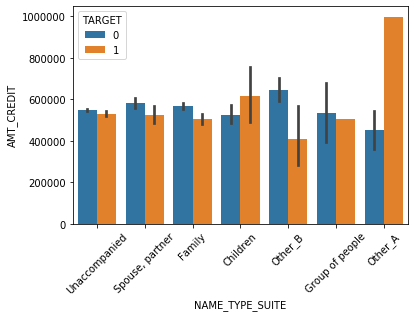

In [519]:
#NAME_TYPE_SUITE vs amt credited
sns.barplot(x=merge_df["NAME_TYPE_SUITE"],y=merge_df["AMT_CREDIT"],hue=merge_df["TARGET"])
plt.xticks(rotation=45)
plt.show()

#### INFERENCES
1. People who came with Other-A are most of the time are Defaulters.
2. People who accompanied their children are also tends to be Defaulter.

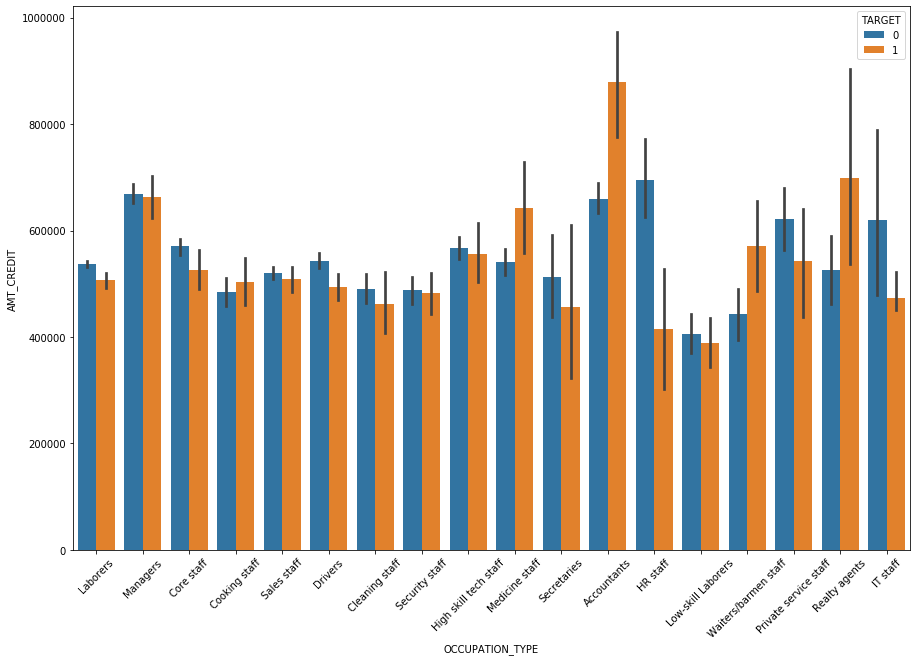

In [524]:
#OCCUPATION_TYPE vs amt credited
plt.figure(figsize=(15,10))
sns.barplot(x=merge_df["OCCUPATION_TYPE"],y=merge_df["AMT_CREDIT"],hue=merge_df["TARGET"])
plt.xticks(rotation=45)
plt.show()

### Infreneces
1. Accountants tends to apply for large sum of loan.
2. MEdicine STaffs, Accountants, Waiters and Realty agents apply for tends to be deaulter.
